In [131]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [132]:
# 노트북 안에 그래프를 그리기 위한 옵션
%matplotlib inline

In [133]:
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 하는 옵션
plt.style.use('ggplot')

In [134]:
# 그래프에서 음수 폰트가 깨지는 현상 막는 옵션
mpl.rcParams['axes.unicode_minus'] = False

In [146]:
# 결과 열을 잘리지 않고 보이게 하기
pd.set_option('display.max_columns', 500)

In [135]:
sys.version

'3.6.7 |Anaconda, Inc.| (default, Dec 10 2018, 20:35:02) [MSC v.1915 64 bit (AMD64)]'

In [136]:
# 숫자를 e+00 으로 표시 안되게 하는 명령어
pd.set_option('float_format', '{:f}'.format)

In [137]:
train = pd.read_csv("../dacon_dataset/train.csv")
train.shape

(1601458, 25)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [139]:
train.head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.430000,6,37.585965,127.000231,...,4.000000,individual,gas,91120,65.630000,46,1.000000,1.000000,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.370000,8,37.585965,127.000231,...,4.000000,individual,gas,91119,61.390000,10,2.000000,1.000000,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.700000,8,37.580511,127.014016,...,9.000000,individual,gas,8430,72.360000,201,2.000000,1.000000,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.660000,11,37.580324,127.011788,...,11.000000,individual,gas,5839,87.300000,284,2.000000,1.000000,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.620000,7,37.580324,127.011788,...,11.000000,individual,gas,5836,127.740000,112,4.000000,2.000000,stairway,280000000
5,5,2815,1,200601,11~20,2000,84.920000,9,37.575381,126.960804,...,10.000000,individual,gas,5831,109.880000,454,3.000000,2.000000,stairway,415000000
6,6,2815,1,200601,11~20,2000,60.000000,13,37.575381,126.960804,...,10.000000,individual,gas,5833,84.330000,207,3.000000,1.000000,corridor,267000000
7,7,9867,1,200601,11~20,2005,84.760000,10,37.559200,127.019503,...,6.000000,individual,gas,11862,104.300000,82,3.000000,2.000000,stairway,415000000
8,8,2818,1,200601,11~20,1999,84.880000,18,37.555060,127.014495,...,8.000000,individual,gas,5843,107.650000,576,3.000000,2.000000,stairway,310000000
9,9,2817,1,200601,11~20,2002,59.940000,12,37.549828,127.009284,...,11.000000,individual,gas,5842,85.900000,864,3.000000,1.000000,corridor,319000000


In [140]:
train.room_count.describe()

count   1600767.000000
mean          2.951266
std           0.665345
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           8.000000
Name: room_count, dtype: float64

In [141]:
train.transaction_real_price.describe()

count      1601458.000000
mean     402175230.258927
std      322386136.969444
min        7000000.000000
25%      199000000.000000
50%      324000000.000000
75%      500000000.000000
max     8200000000.000000
Name: transaction_real_price, dtype: float64

In [142]:
train.isnull().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91813
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              691
bathroom_count                  

In [158]:
train[train["room_count"].isnull()].head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
1519,1519,9005,1,200601,11~20,2004,36.470000,15,37.506169,127.050931,1168010500,341.000000,418,2,15.000000,12.000000,individual,gas,165293,47.600000,55,nan,nan,NaN,147000000
1520,1520,9005,1,200601,11~20,2004,36.470000,13,37.506169,127.050931,1168010500,341.000000,418,2,15.000000,12.000000,individual,gas,165293,47.600000,55,nan,nan,NaN,148000000
1904,1904,1179,1,200601,11~20,1983,125.970000,8,37.516447,127.107486,1171010200,264.000000,120,2,10.000000,10.000000,district,cogeneration,165927,142.120000,54,nan,nan,NaN,1000000000
5857,5857,1179,1,200601,21~31,1983,125.980000,2,37.516447,127.107486,1171010200,264.000000,120,2,10.000000,10.000000,district,cogeneration,165926,142.130000,54,nan,nan,NaN,1010000000
12122,12122,9005,1,200602,1~10,2003,36.160000,6,37.506169,127.050931,1168010500,341.000000,418,2,15.000000,12.000000,individual,gas,165291,45.070000,105,nan,nan,NaN,140000000
19609,19609,1179,1,200603,11~20,1983,125.980000,7,37.516447,127.107486,1171010200,264.000000,120,2,10.000000,10.000000,district,cogeneration,165926,142.130000,54,nan,nan,NaN,1300000000
20158,20158,9005,1,200603,11~20,2004,48.810000,14,37.506169,127.050931,1168010500,341.000000,418,2,15.000000,12.000000,individual,gas,165295,63.710000,26,nan,nan,NaN,220000000
22215,22215,7992,1,200603,1~10,2001,62.700000,3,37.595686,126.913448,1138010900,159.000000,116,1,16.000000,4.000000,individual,gas,165725,80.960000,23,nan,nan,NaN,146500000
29700,29700,9005,1,200603,21~31,2004,36.350000,15,37.506169,127.050931,1168010500,341.000000,418,2,15.000000,12.000000,individual,gas,165292,47.440000,204,nan,nan,NaN,145000000
31677,31677,7992,1,200604,11~20,2001,58.590000,11,37.595686,126.913448,1138010900,159.000000,116,1,16.000000,4.000000,individual,gas,165722,74.680000,1,nan,nan,NaN,150000000


In [194]:
train[train["latitude"]==37.595686]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price


In [47]:
# transcation_year_month를 년과 월로 바꾸기 위하여
str(train["transaction_year_month"][0:1])[5:9]
str(train["transaction_year_month"][0:1])[9:11]

'01'

In [45]:
# transaction_year_month 의 갯수
train["transaction_year_month"].count()

1601458

In [50]:
# transcation_year_month를 년과 월로 바꾸기 위하여
type(int(str(train["transaction_year_month"][0:1])[5:9]))

int

In [77]:
train["year"] = 0
train["month"] = 0

In [56]:
train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,year,month
0,0,5584,1,200601,11~20,1999,47.430000,6,37.585965,127.000231,...,gas,91120,65.630000,46,1.000000,1.000000,corridor,215000000,0,0
1,1,5584,1,200601,11~20,1999,44.370000,8,37.585965,127.000231,...,gas,91119,61.390000,10,2.000000,1.000000,corridor,200000000,0,0
2,2,5059,1,200601,11~20,1992,54.700000,8,37.580511,127.014016,...,gas,8430,72.360000,201,2.000000,1.000000,corridor,168000000,0,0
3,3,2816,1,200601,11~20,1993,64.660000,11,37.580324,127.011788,...,gas,5839,87.300000,284,2.000000,1.000000,corridor,165000000,0,0
4,4,2816,1,200601,11~20,1993,106.620000,7,37.580324,127.011788,...,gas,5836,127.740000,112,4.000000,2.000000,stairway,280000000,0,0


In [78]:
train["year"][0]

0

In [74]:
# 이런식으로 하면 error 발생
'''
for i in range(train["transaction_year_month"].count()) :
    train["year"][i] = int(str(train["transaction_year_month"][i:i+1])[5:9])
    train['month'][i] = int(str(train["transaction_year_month"][i:i+1])[9:11])
    
'''

C:\Python\Anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [80]:
train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,year,month
0,0,5584,1,200601,11~20,1999,47.430000,6,37.585965,127.000231,...,gas,91120,65.630000,46,1.000000,1.000000,corridor,215000000,0,0
1,1,5584,1,200601,11~20,1999,44.370000,8,37.585965,127.000231,...,gas,91119,61.390000,10,2.000000,1.000000,corridor,200000000,0,0
2,2,5059,1,200601,11~20,1992,54.700000,8,37.580511,127.014016,...,gas,8430,72.360000,201,2.000000,1.000000,corridor,168000000,0,0
3,3,2816,1,200601,11~20,1993,64.660000,11,37.580324,127.011788,...,gas,5839,87.300000,284,2.000000,1.000000,corridor,165000000,0,0
4,4,2816,1,200601,11~20,1993,106.620000,7,37.580324,127.011788,...,gas,5836,127.740000,112,4.000000,2.000000,stairway,280000000,0,0


In [92]:
# 년도와 월을 나눠서 표시
train["year"] = train["transaction_year_month"]/100
train["month"] = train["transaction_year_month"]%100

In [93]:
train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,year,month
0,0,5584,1,200601,11~20,1999,47.430000,6,37.585965,127.000231,...,gas,91120,65.630000,46,1.000000,1.000000,corridor,215000000,2006.010000,1
1,1,5584,1,200601,11~20,1999,44.370000,8,37.585965,127.000231,...,gas,91119,61.390000,10,2.000000,1.000000,corridor,200000000,2006.010000,1
2,2,5059,1,200601,11~20,1992,54.700000,8,37.580511,127.014016,...,gas,8430,72.360000,201,2.000000,1.000000,corridor,168000000,2006.010000,1
3,3,2816,1,200601,11~20,1993,64.660000,11,37.580324,127.011788,...,gas,5839,87.300000,284,2.000000,1.000000,corridor,165000000,2006.010000,1
4,4,2816,1,200601,11~20,1993,106.620000,7,37.580324,127.011788,...,gas,5836,127.740000,112,4.000000,2.000000,stairway,280000000,2006.010000,1


In [96]:
# 연도의 소숫점을 버려줌
train['year'] = train['year'].astype(int)

In [97]:
train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,year,month
0,0,5584,1,200601,11~20,1999,47.430000,6,37.585965,127.000231,...,gas,91120,65.630000,46,1.000000,1.000000,corridor,215000000,2006,1
1,1,5584,1,200601,11~20,1999,44.370000,8,37.585965,127.000231,...,gas,91119,61.390000,10,2.000000,1.000000,corridor,200000000,2006,1
2,2,5059,1,200601,11~20,1992,54.700000,8,37.580511,127.014016,...,gas,8430,72.360000,201,2.000000,1.000000,corridor,168000000,2006,1
3,3,2816,1,200601,11~20,1993,64.660000,11,37.580324,127.011788,...,gas,5839,87.300000,284,2.000000,1.000000,corridor,165000000,2006,1
4,4,2816,1,200601,11~20,1993,106.620000,7,37.580324,127.011788,...,gas,5836,127.740000,112,4.000000,2.000000,stairway,280000000,2006,1


ValueError: Could not interpret input 'count'

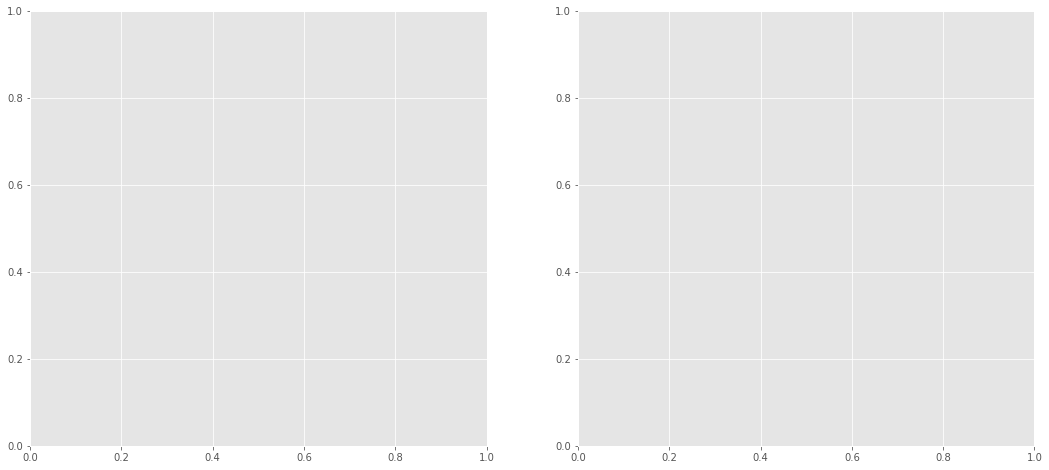

In [106]:
# ax1, ax2 는 alias 로 위치를 지정함 >> 서브 플랏으 모양으로 1x2의 플랏이 완성됨
'''
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)


sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
'''
# 카운트가 되지 않았기 때문에 이 코드는 적절치 않음

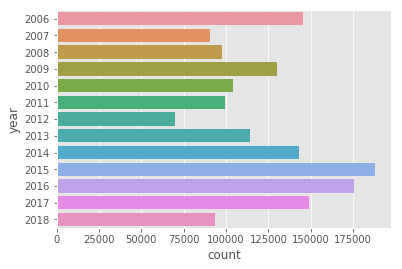

In [107]:
# 연도 별 판매량
sns.countplot(y='year', data=train)

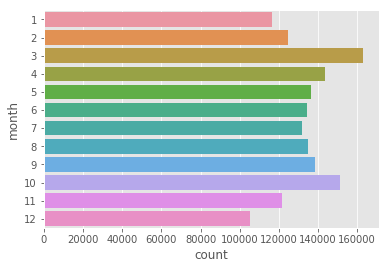

In [108]:
# 월별 판매량
sns.countplot(y="month", data=train)

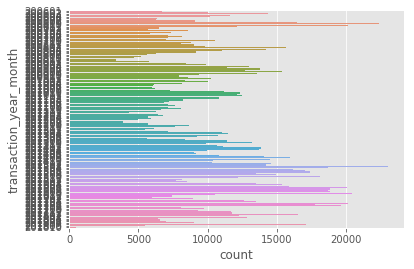

In [109]:
#연도-월별 판매량
sns.countplot(y="transaction_year_month", data=train)

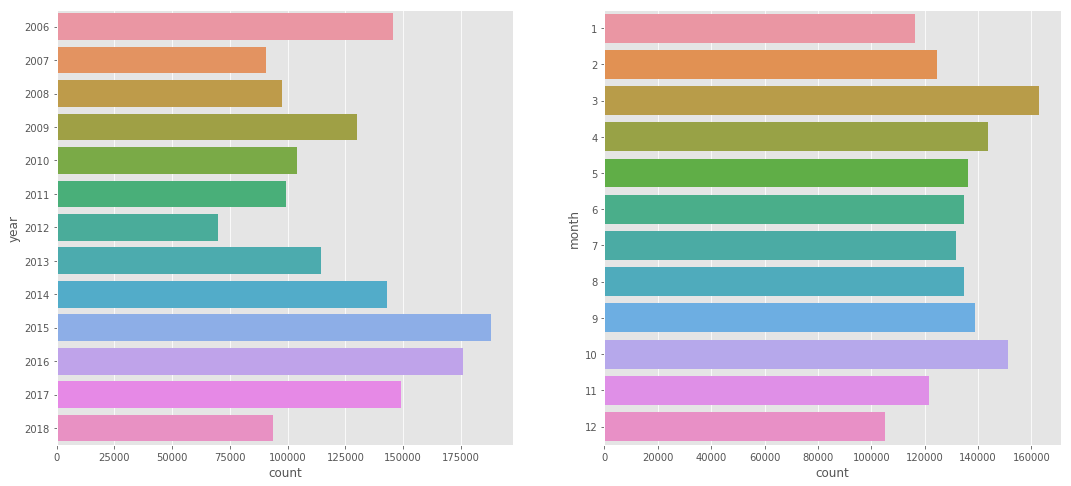

In [111]:
# 연도와 월을 같이 옆으로 표시
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

sns.countplot(y="year", data=train, ax = ax1)
sns.countplot(y="month", data=train, ax = ax2)

In [237]:
# 연도-월별 판매량을 알기 위해 카운트
pd.DataFrame(train['transaction_year_month'].value_counts()).head()

,transaction_year_month
201503,23057
200610,22423
201610,20416
201705,20179
200611,20148


In [114]:
trade_y_m = pd.DataFrame(train['transaction_year_month'].value_counts())

In [117]:
# 'country' 컬럼을 인덱스로 지정해 주고
trade_y_m['년-월'] = trade_y_m.index

In [236]:
trade_y_m.head()

,판매량,년-월
0,23057,201503
1,22423,200610
2,20416,201610
3,20179,201705
4,20148,200611


In [119]:
# 컬럼의 순서대로 응답 수, 국가로 칼럼 명을 지정해 줌
trade_y_m.columns = ['판매량', '년-월']

In [121]:
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
trade_y_m = trade_y_m.reset_index().drop('index', axis=1)
trade_y_m.head(20)

,판매량,년-월
0,23057,201503
1,22423,200610
2,20416,201610
3,20179,201705
4,20148,200611
5,20049,201606
6,19651,201707
7,18862,201607
8,18830,201609
9,18738,201504


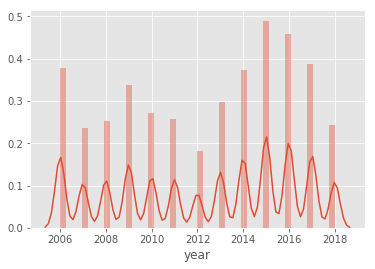

In [122]:
# 애들은 왜 이렇게 안나오는 걸까요...?
sns.distplot(train["year"])

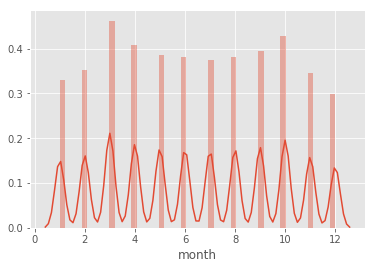

In [123]:
sns.distplot(train["month"])

In [125]:
train["transaction_year_month"]

0          200601
1          200601
2          200601
3          200601
4          200601
5          200601
6          200601
7          200601
8          200601
9          200601
10         200601
11         200601
12         200601
13         200601
14         200601
15         200601
16         200601
17         200601
18         200601
19         200601
20         200601
21         200601
22         200601
23         200601
24         200601
25         200601
26         200601
27         200601
28         200601
29         200601
            ...  
1601428    201810
1601429    201810
1601430    201810
1601431    201810
1601432    201810
1601433    201810
1601434    201810
1601435    201810
1601436    201810
1601437    201810
1601438    201810
1601439    201810
1601440    201810
1601441    201810
1601442    201810
1601443    201810
1601444    201810
1601445    201810
1601446    201810
1601447    201810
1601448    201810
1601449    201810
1601450    201810
1601451    201810
1601452   

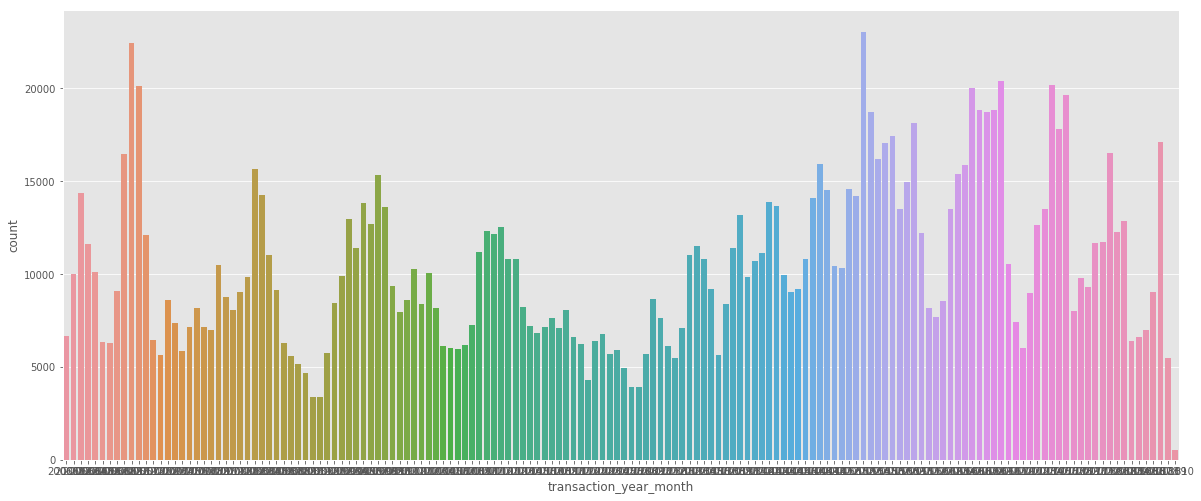

In [130]:
# 글자가 너무 안 보여서 확대했으나 잘 안보임...
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.countplot(data=train, x="transaction_year_month", ax = ax)

In [197]:
# 방 갯수와 욕실 갯수가 없는 데이터 삭제한 데이터 프레임 만들기
bath_notnull_df = train[train["room_count"].notnull()]

In [202]:
bath_notnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600767 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1600767 non-null int64
apartment_id                          1600767 non-null int64
city                                  1600767 non-null int64
transaction_year_month                1600767 non-null int64
transaction_date                      1600767 non-null object
year_of_completion                    1600767 non-null int64
exclusive_use_area                    1600767 non-null float64
floor                                 1600767 non-null int64
latitude                              1600767 non-null float64
longitude                             1600767 non-null float64
address_by_law                        1600767 non-null int64
total_parking_capacity_in_site        1508963 non-null float64
total_household_count_in_sites        1600767 non-null int64
apartment_building_count_in_sites     1600767 non-null int64
tallest_building_in_site

In [215]:
bath_notnull_df["exclusive_use_area"].describe()

count   1600767.000000
mean         79.476515
std          27.999228
min          16.396000
25%          59.840000
50%          84.460000
75%          84.980000
max         295.434000
Name: exclusive_use_area, dtype: float64

In [216]:
bath_notnull_df[bath_notnull_df["exclusive_use_area"]==0].head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price


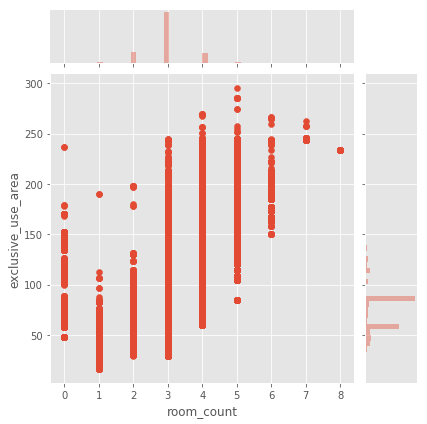

In [217]:
sns.jointplot(x="room_count", y="exclusive_use_area", data=bath_notnull_df)

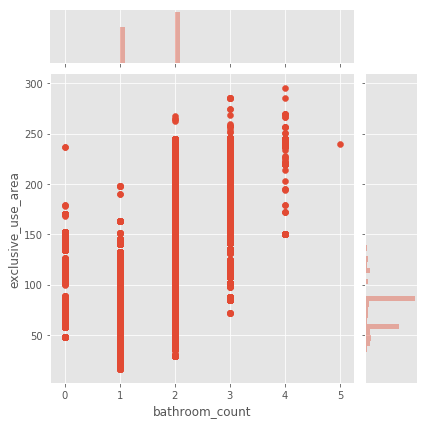

In [218]:
sns.jointplot(x="bathroom_count", y="exclusive_use_area", data=bath_notnull_df)

In [220]:
bath_notnull_df[bath_notnull_df["room_count"]==0]["exclusive_use_area"].describe()

count   3231.000000
mean     104.149541
std       24.232155
min       47.790000
25%       84.365700
50%      114.230000
75%      118.250000
max      236.900000
Name: exclusive_use_area, dtype: float64

In [221]:
train["transaction_real_price"].describe()

count      1601458.000000
mean     402175230.258927
std      322386136.969444
min        7000000.000000
25%      199000000.000000
50%      324000000.000000
75%      500000000.000000
max     8200000000.000000
Name: transaction_real_price, dtype: float64

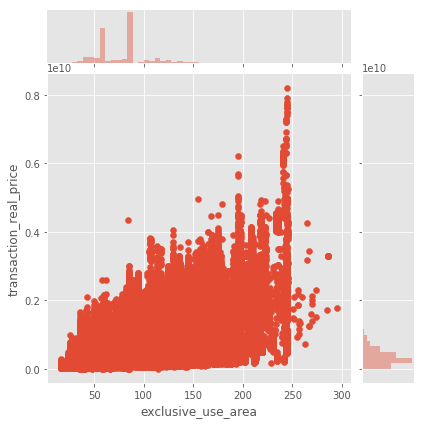

In [222]:
sns.jointplot(y="transaction_real_price", x="exclusive_use_area", data=bath_notnull_df)

In [223]:
train["floor"].describe()

count   1601458.000000
mean         10.130310
std           7.194129
min          -4.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: floor, dtype: float64

In [229]:
train[train["floor"]<=-2].head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
510953,510954,19493,1,201006,21~30,2010,101.490000,-3,37.635197,126.926069,1138011400,855.000000,472,22,15.000000,4.000000,district,cogeneration,16834,124.100000,0,3.000000,2.000000,mixed,510000000
510954,510955,19493,1,201006,21~30,2010,101.490000,-3,37.635197,126.926069,1138011400,855.000000,472,22,15.000000,4.000000,district,cogeneration,16836,125.540000,0,3.000000,2.000000,NaN,510000000
634329,634330,19493,1,201108,1~10,2010,134.660000,-2,37.635197,126.926069,1138011400,855.000000,472,22,15.000000,4.000000,district,cogeneration,16850,165.590000,0,3.000000,2.000000,NaN,659190000
667437,667438,19493,1,201201,11~20,2010,134.460000,-4,37.635197,126.926069,1138011400,855.000000,472,22,15.000000,4.000000,district,cogeneration,16851,165.600000,0,3.000000,2.000000,NaN,626000000
667438,667439,19493,1,201201,11~20,2010,134.460000,-4,37.635197,126.926069,1138011400,855.000000,472,22,15.000000,4.000000,district,cogeneration,16853,165.770000,0,3.000000,2.000000,mixed,626000000


In [230]:
train.total_parking_capacity_in_site.describe()

count   1509645.000000
mean       1350.190435
std        1494.472704
min           0.000000
25%         413.000000
50%         820.000000
75%        1659.000000
max        9766.000000
Name: total_parking_capacity_in_site, dtype: float64

In [235]:
train[train["total_parking_capacity_in_site"]==0].head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
9207,9207,34608,0,200602,11~20,1981,54.200000,2,35.151199,129.046997,2623010400,0.000000,159,4,5.000000,5.000000,individual,gas,145611,67.520000,25,3.000000,2.000000,stairway,55000000
12438,12438,34608,0,200602,1~10,1981,48.000000,1,35.151199,129.046997,2623010400,0.000000,159,4,5.000000,5.000000,individual,gas,145608,60.640000,15,3.000000,1.000000,stairway,46000000
20023,20023,34608,0,200603,11~20,1981,54.200000,1,35.151199,129.046997,2623010400,0.000000,159,4,5.000000,5.000000,individual,gas,145611,67.520000,25,3.000000,2.000000,stairway,55500000
45109,45109,34608,0,200605,11~20,1981,48.000000,1,35.151199,129.046997,2623010400,0.000000,159,4,5.000000,5.000000,individual,gas,145608,60.640000,15,3.000000,1.000000,stairway,44500000
96547,96547,34608,0,200610,11~20,1981,48.000000,5,35.151199,129.046997,2623010400,0.000000,159,4,5.000000,5.000000,individual,gas,145608,60.640000,15,3.000000,1.000000,stairway,50000000


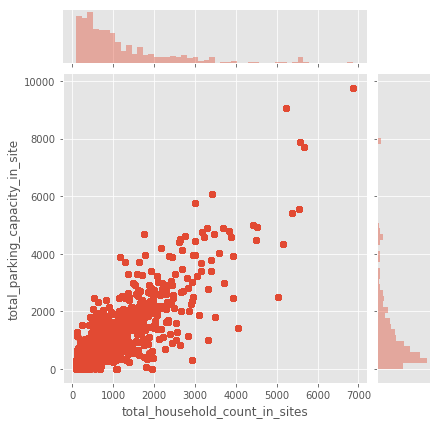

In [242]:
# 총 세대수와 주차장의 관계를 나타내는 플랏, 의미 있어 보임
sns.jointplot(x="total_household_count_in_sites", y="total_parking_capacity_in_site", data=train)

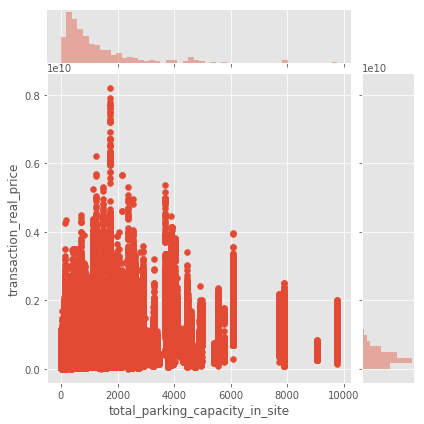

In [259]:
# 실거래가와와 주차장의 관계를 나타내는 플랏, 의미는 그닥...
sns.jointplot(y="transaction_real_price", x="total_parking_capacity_in_site", data=train)

In [248]:
heat_notnull = train[train["heat_fuel"].notnull()]

In [256]:
heat_notnull.isnull().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91805
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                                 0
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              685
bathroom_count                  

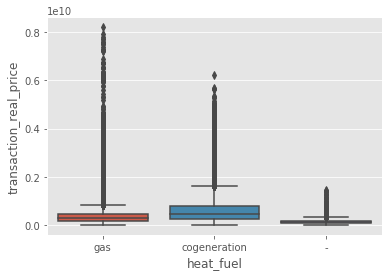

In [260]:
sns.boxplot(x="heat_fuel", y="transaction_real_price", data=heat_notnull)

In [261]:
heat_notnull.describe()

,key,apartment_id,city,transaction_year_month,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
count,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1499986.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591791.000000,1591106.000000,1591106.000000,1591791.000000
mean,800252.424539,7765.966569,0.624392,201241.177869,1998.634472,79.449303,10.125319,36.659874,127.776282,1705609459.584508,1346.692274,1178.031409,12.726209,20.756341,13.910831,34827.023504,101.968275,293.391114,2.951118,1.587217,401706887.549936
std,462062.163391,7329.927021,0.484280,377.408009,8.435271,27.989960,7.191113,1.158181,1.005902,721936314.667666,1496.268440,1128.606514,14.022146,8.725324,6.712968,41547.130975,33.045039,324.321458,0.665599,0.507213,322746351.615822
min,0.000000,3.000000,0.000000,200601.000000,1962.000000,16.396000,-4.000000,35.048786,126.806102,1111011500.000000,0.000000,99.000000,1.000000,5.000000,1.000000,13.000000,20.100000,0.000000,0.000000,0.000000,7000000.000000
25%,400189.500000,1605.000000,0.000000,200907.000000,1993.000000,59.830000,5.000000,35.188861,126.978456,1138010100.000000,411.000000,414.000000,4.000000,15.000000,9.000000,6614.000000,79.930000,90.000000,3.000000,1.000000,198000000.000000
50%,799804.000000,5619.000000,1.000000,201308.000000,1999.000000,84.456800,9.000000,37.498666,127.074605,1165010600.000000,819.000000,807.000000,9.000000,20.000000,13.000000,20496.000000,102.960000,194.000000,3.000000,2.000000,322100000.000000
75%,1200424.500000,11063.000000,1.000000,201603.000000,2005.000000,84.980000,14.000000,37.566141,129.029816,2632010200.000000,1643.000000,1572.000000,15.000000,25.000000,17.000000,42221.000000,111.520000,384.000000,3.000000,2.000000,500000000.000000
max,1605373.000000,50264.000000,1.000000,201810.000000,2018.000000,295.434000,80.000000,37.687633,129.237592,2671033029.000000,9766.000000,6864.000000,124.000000,80.000000,70.000000,192252.000000,423.400000,2960.000000,8.000000,5.000000,8200000000.000000


In [266]:
train[train["lowest_building_in_sites"] <= 1]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
67,67,484,1,200601,11~20,1977,86.120000,4,37.532796,126.950925,1117011800,nan,554,6,12.000000,1.000000,district,cogeneration,1266,112.400000,120,4.000000,1.000000,corridor,470000000
271,271,2912,1,200601,11~20,1998,114.930000,12,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,6186,142.080000,122,4.000000,2.000000,stairway,268000000
272,272,2912,1,200601,11~20,1998,114.930000,12,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,150649,141.890000,36,4.000000,2.000000,stairway,268000000
273,273,2912,1,200601,11~20,1998,114.930000,12,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,150650,142.080000,52,4.000000,2.000000,stairway,268000000
274,274,2912,1,200601,11~20,1998,114.930000,12,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,150651,142.340000,1,4.000000,2.000000,stairway,268000000
275,275,2912,1,200601,11~20,1998,114.930000,12,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,150652,144.070000,7,4.000000,2.000000,stairway,268000000
282,282,2912,1,200601,11~20,1998,84.920000,4,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,147192,108.750000,6,3.000000,2.000000,stairway,219000000
283,283,2912,1,200601,11~20,1998,84.920000,4,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,147193,108.750000,173,3.000000,2.000000,stairway,219000000
284,284,2912,1,200601,11~20,1998,84.920000,4,37.603336,127.028008,1129010300,517.000000,499,5,20.000000,1.000000,individual,gas,150648,110.430000,132,3.000000,2.000000,stairway,219000000
2274,2274,5557,0,200601,11~20,1986,64.620000,6,35.178257,129.110684,2647010200,2050.000000,2038,23,15.000000,1.000000,individual,gas,33598,89.260000,180,3.000000,1.000000,corridor,132500000


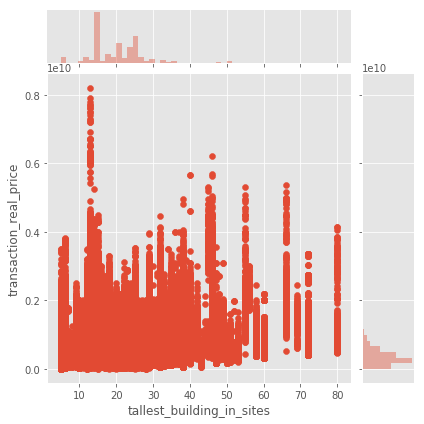

In [267]:
sns.jointplot(x="tallest_building_in_sites", y="transaction_real_price", data=train)

In [ ]:
sns.jointplot(x="year_of_completion", y="transaction_real_price", data=train)

In [ ]:
corrMatt = train[['transaction_real_price', 'room_count', 'bathroom_count', 'tallest_building_in_sites', 'year_of_completion', 'transaction_year_month', 'total_household_count_in_sites']]